# Digital Filter (FIR vs IIR)

## Import Library

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy.signal import firwin, filtfilt, butter
import datetime as dt

## Dummy Signal
Dalam hal ini, kita akan menggunakan sinyal ECG

In [93]:
duration = 10
fs = 1000

ecg = nk.ecg_simulate(
    duration=duration,
    sampling_rate=fs,
    heart_rate=70,
    noise=0.25,
    random_state=1113
)

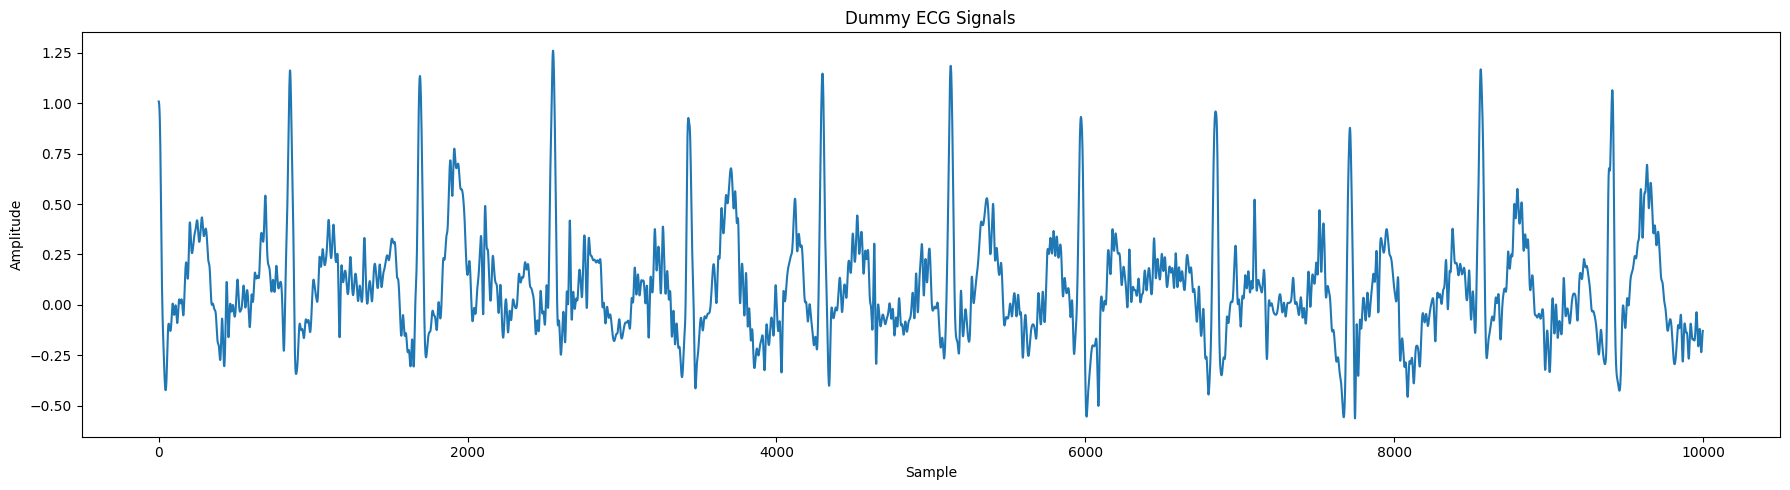

In [94]:
plt.figure(figsize=(18, 5))
plt.plot(ecg)
plt.title("Dummy ECG Signals")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Filter Dengan Rentang (1Hz - 2.5 Hz)

In [95]:
lowcut = 1 #hz
highcut = 2.5 #hz

### Memfilter dengan FIR - Manual

In [96]:
nyquist_rate = fs / 2
lowcut_nyquist = lowcut / nyquist_rate
highcut_nyquist = highcut / nyquist_rate
fft_order = 101

In [97]:
n = np.arange(fft_order)
M = (fft_order - 1) // 2
h_ideal = np.zeros(fft_order)

print(f"n: {n}\nM: {M}\nh_ideal: {h_ideal}")

n: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
M: 50
h_ideal: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


Mendesain filter

In [98]:
for i in range(fft_order):
    if i == M:
        h_ideal[i] = 2 * (highcut_nyquist - lowcut_nyquist)
    else:
        h_ideal[i] = (
            np.sin(2 * np.pi * highcut_nyquist * (i - M)) / (np.pi * (i - M))
            - np.sin(2 * np.pi * lowcut_nyquist * (i - M)) / (np.pi * (i - M))
        )
        
h = h_ideal * np.hamming(fft_order)
print(f"h: {h}")

h: [0.00020994 0.00022176 0.00023889 0.00026189 0.00029132 0.00032766
 0.00037137 0.00042284 0.00048241 0.00055034 0.00062686 0.0007121
 0.00080614 0.00090898 0.00102057 0.00114077 0.00126936 0.00140608
 0.00155057 0.00170242 0.00186116 0.00202623 0.00219704 0.00237293
 0.00255319 0.00273706 0.00292375 0.00311241 0.00330219 0.00349217
 0.00368146 0.00386913 0.00405423 0.00423583 0.004413   0.00458483
 0.00475041 0.00490886 0.00505934 0.00520103 0.00533318 0.00545505
 0.00556598 0.00566537 0.00575265 0.00582734 0.00588903 0.00593738
 0.0059721  0.00599302 0.006      0.00599302 0.0059721  0.00593738
 0.00588903 0.00582734 0.00575265 0.00566537 0.00556598 0.00545505
 0.00533318 0.00520103 0.00505934 0.00490886 0.00475041 0.00458483
 0.004413   0.00423583 0.00405423 0.00386913 0.00368146 0.00349217
 0.00330219 0.00311241 0.00292375 0.00273706 0.00255319 0.00237293
 0.00219704 0.00202623 0.00186116 0.00170242 0.00155057 0.00140608
 0.00126936 0.00114077 0.00102057 0.00090898 0.00080614 0.00

Menerapkan filter

In [99]:
filtered_ecg = np.convolve(ecg, h, mode="same")

Melihat hasilnya

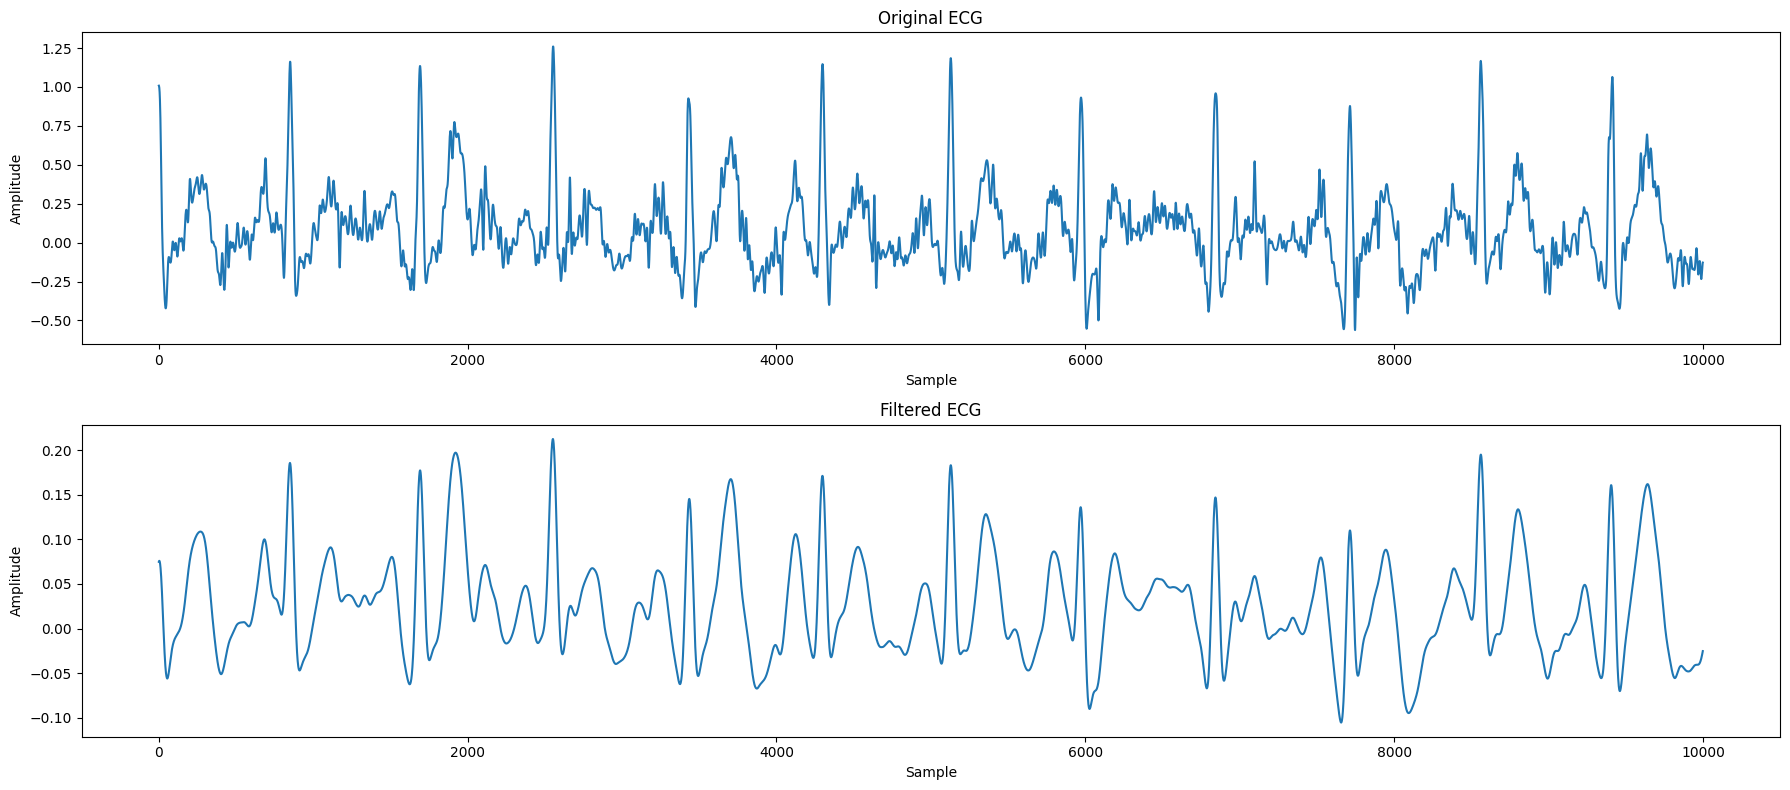

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(18, 8))
ax[0].plot(ecg)
ax[0].set_title("Original ECG")
ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Amplitude")

ax[1].plot(filtered_ecg)
ax[1].set_title("Filtered ECG")
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()


## FIR Filter dengan Scipy

In [101]:
nyquist_rate = fs / 2
lowcut_nyquist = lowcut / nyquist_rate
highcut_nyquist = highcut / nyquist_rate
fft_order = 101

Mendesain filter (saringannya)

In [102]:
fir_coeff = firwin(
    fft_order,
    [lowcut_nyquist, highcut_nyquist],
    pass_zero=False,
)

Menerapkan filter

In [103]:
waktu_mulai = dt.datetime.now()
filtered_fft_scipy_ecg = filtfilt(fir_coeff, 1, ecg)
waktu_selesai = dt.datetime.now()

print(f"Durasi filter: {waktu_selesai - waktu_mulai}")

Durasi filter: 0:00:00.010087


Melihat hasilnya

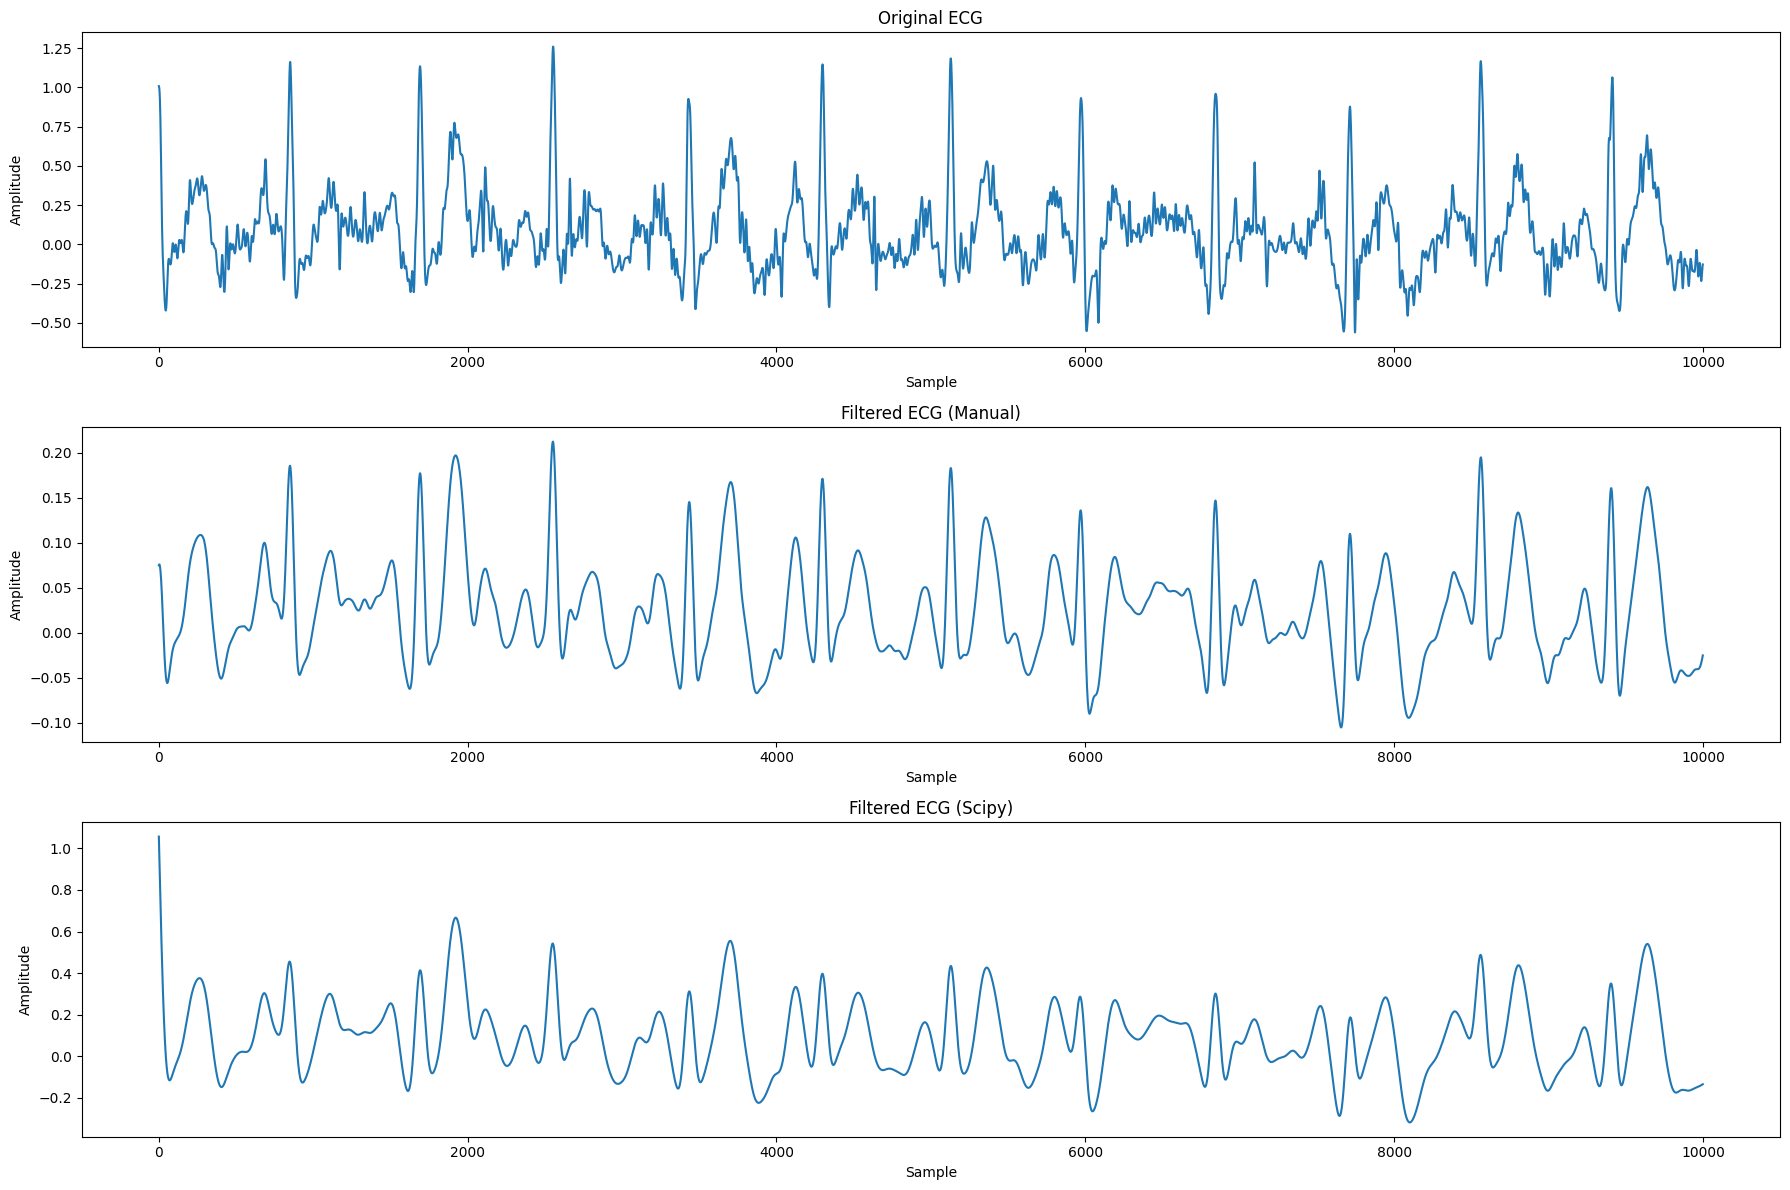

In [104]:
fig, ax = plt.subplots(3, 1, figsize=(18, 12))
ax[0].plot(ecg)
ax[0].set_title("Original ECG")
ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Amplitude")

ax[1].plot(filtered_ecg)
ax[1].set_title("Filtered ECG (Manual)")
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("Amplitude")

ax[2].plot(filtered_fft_scipy_ecg)
ax[2].set_title("Filtered ECG (Scipy)")
ax[2].set_xlabel("Sample")
ax[2].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

## IIR Filter dengan Scipy

In [105]:
lowcut_iir = 0.5
highcut_iir = 4.0
b, a = butter(1, [lowcut_iir, highcut_iir], btype="bandpass", fs=fs)
waktu_mulai = dt.datetime.now()
filtered_iir_scipy_ecg = filtfilt(b, a, ecg)
waktu_selesai = dt.datetime.now()

print(f"Durasi filter: {waktu_selesai - waktu_mulai}")

Durasi filter: 0:00:00.001760


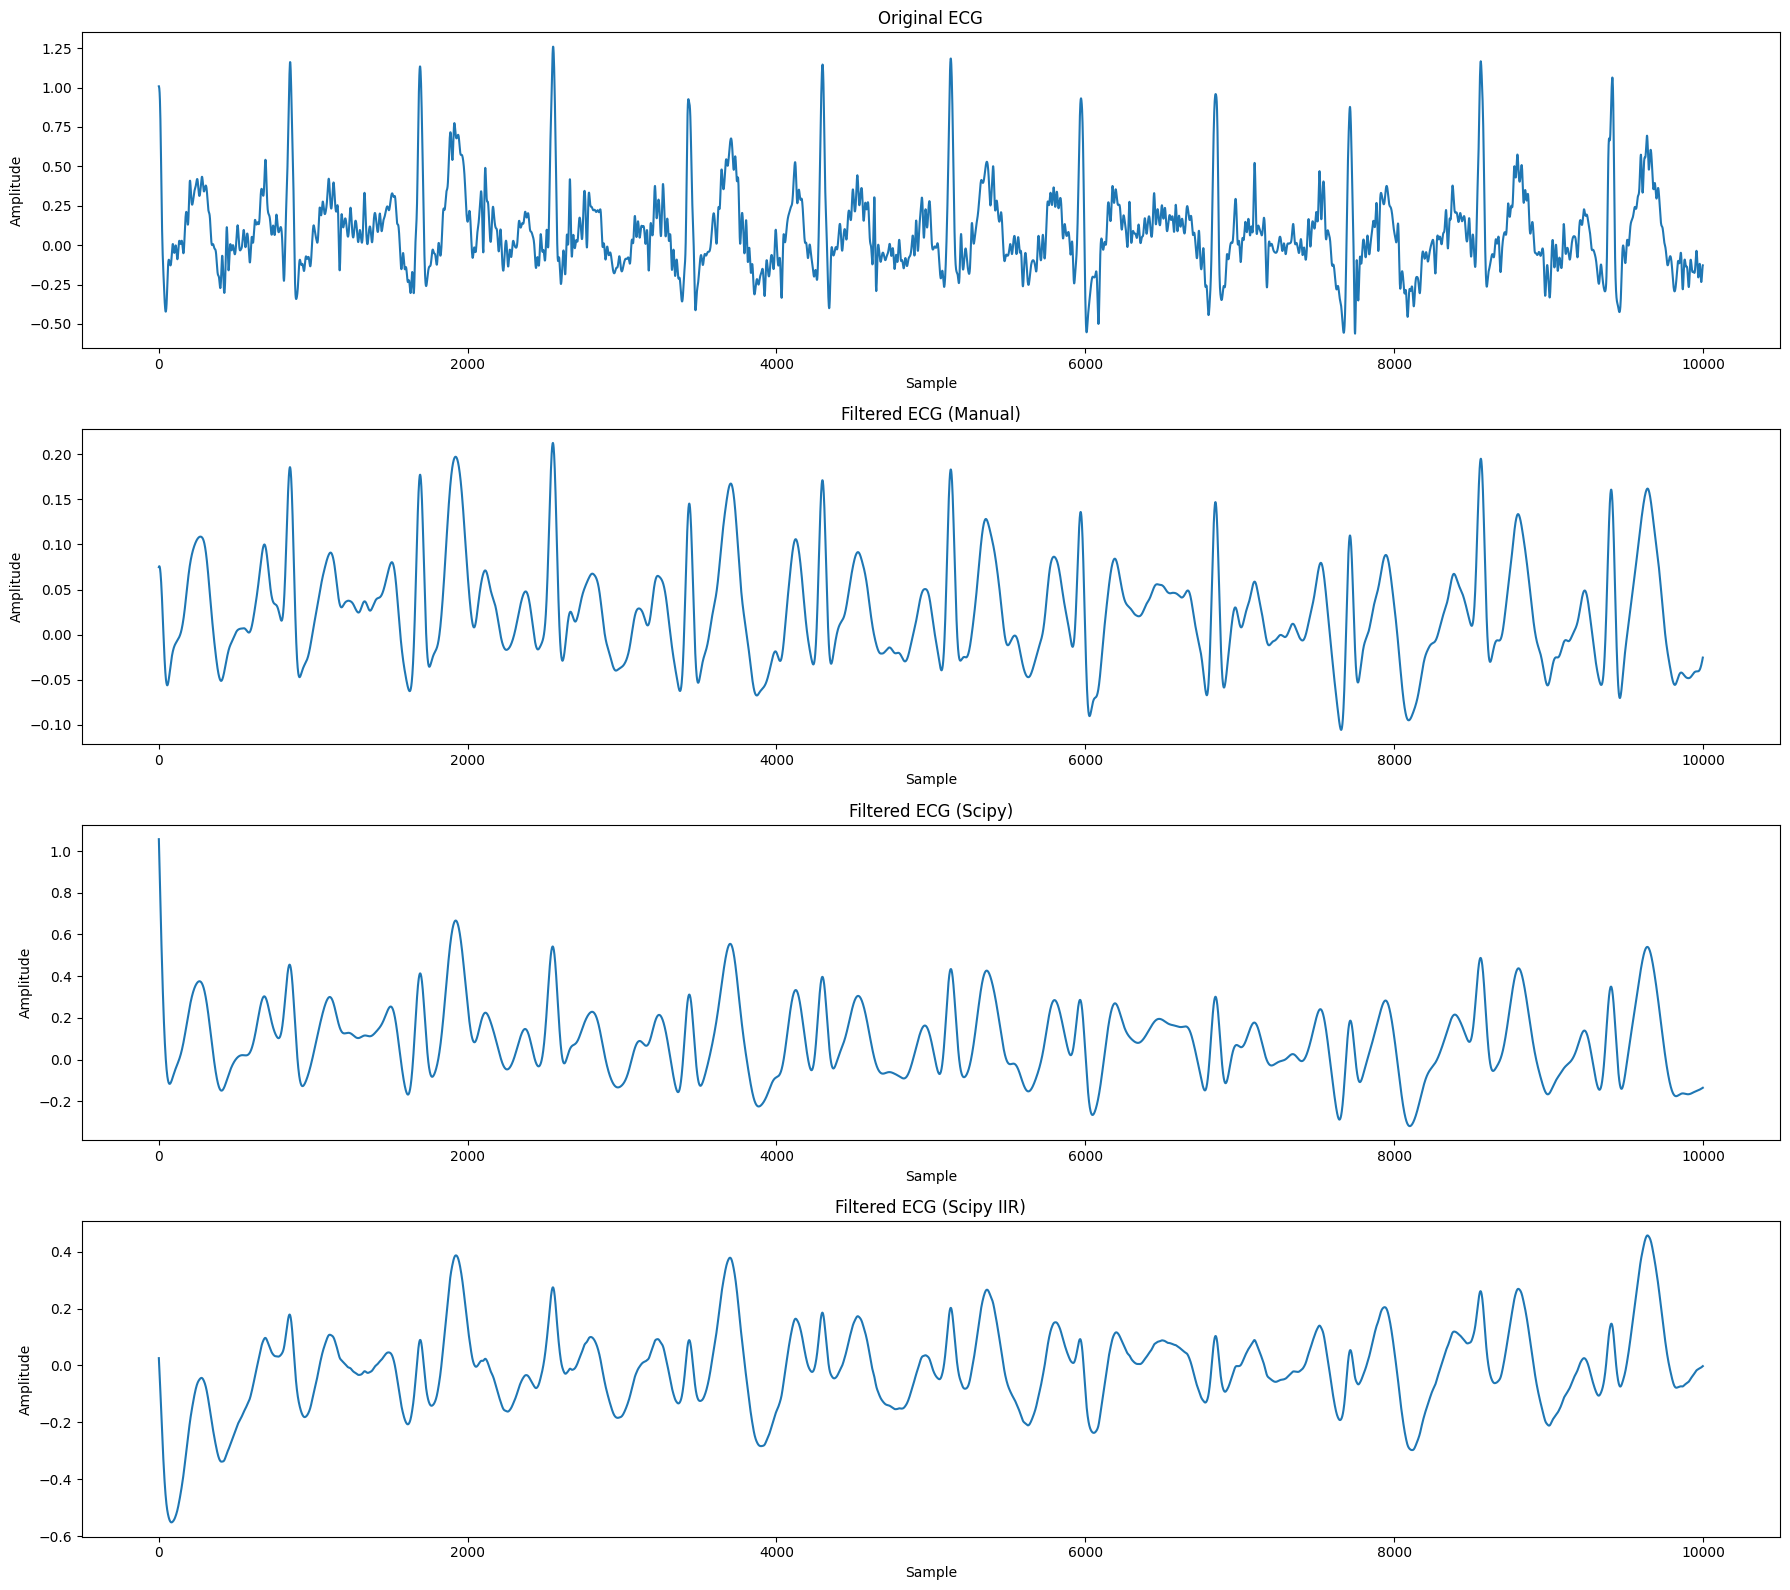

In [106]:
fig, ax = plt.subplots(4, 1, figsize=(18, 16))
ax[0].plot(ecg)
ax[0].set_title("Original ECG")
ax[0].set_xlabel("Sample")
ax[0].set_ylabel("Amplitude")

ax[1].plot(filtered_ecg)
ax[1].set_title("Filtered ECG (Manual)")
ax[1].set_xlabel("Sample")
ax[1].set_ylabel("Amplitude")

ax[2].plot(filtered_fft_scipy_ecg)
ax[2].set_title("Filtered ECG (Scipy)")
ax[2].set_xlabel("Sample")
ax[2].set_ylabel("Amplitude")

ax[3].plot(filtered_iir_scipy_ecg)
ax[3].set_title("Filtered ECG (Scipy IIR)")
ax[3].set_xlabel("Sample")
ax[3].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

visualisasi hasil